In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales/Walmart_Sales.csv


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/kaggle/input/walmart-sales/Walmart_Sales.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
round(df.describe(),2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(6435, 8)

In [15]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

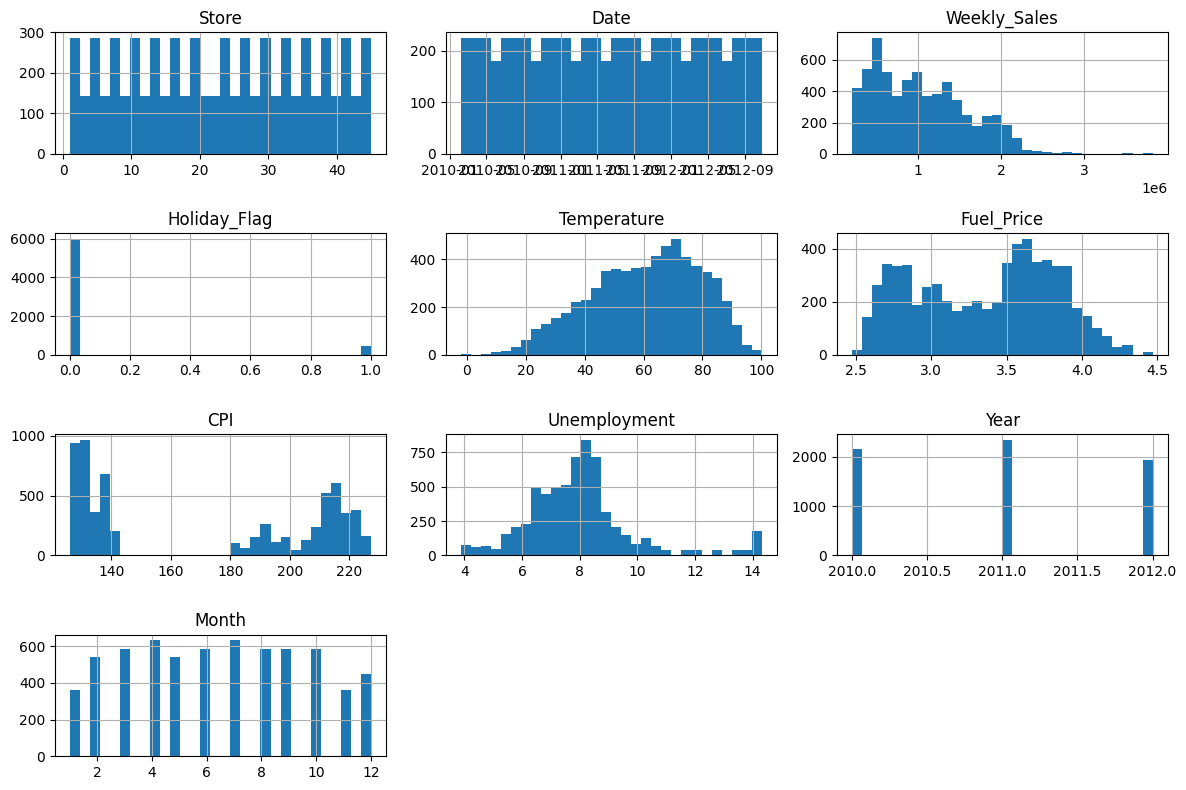

In [104]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

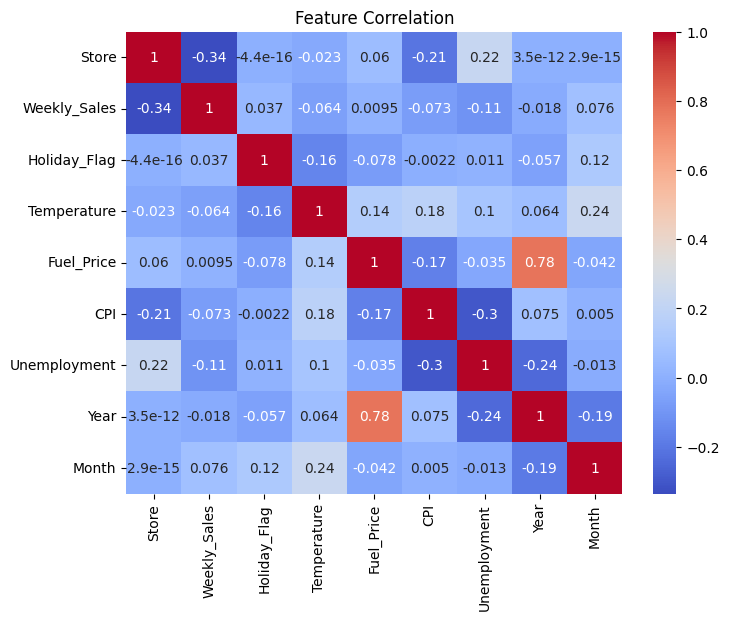

In [106]:
numeric_df = df.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [39]:
total_sales_by_store = (
    df.groupby('Store')['Weekly_Sales']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

total_sales_by_store['Weekly_Sales'] = total_sales_by_store['Weekly_Sales'].apply(lambda x: f"{x:,.0f}")

total_sales_by_store.head(5)


,Store,Weekly_Sales
0,20,"301,397,792"
1,4,"299,543,953"
2,14,"288,999,911"
3,13,"286,517,704"
4,2,"275,382,441"


In [34]:
holiday_sales=df[df['Holiday_Flag']==1]
holiday_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742


In [42]:
total_holiday_sales = (
    holiday_sales.groupby('Store')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

total_holiday_sales['Weekly_Sales'] = total_holiday_sales['Weekly_Sales'].apply(lambda x: f"{x:,.0f}")
total_holiday_sales


,Store,Weekly_Sales
0,20,"22,490,351"
1,4,"22,431,026"
2,14,"21,205,830"
3,10,"21,137,559"
4,13,"21,130,438"
5,2,"20,792,669"
6,27,"18,922,993"
7,6,"16,809,079"
8,1,"16,657,477"
9,19,"15,770,467"


In [43]:
total_sales_by_store.head(5)

,Store,Weekly_Sales
0,20,"301,397,792"
1,4,"299,543,953"
2,14,"288,999,911"
3,13,"286,517,704"
4,2,"275,382,441"


In [44]:
total_holiday_sales.head(5)

,Store,Weekly_Sales
0,20,"22,490,351"
1,4,"22,431,026"
2,14,"21,205,830"
3,10,"21,137,559"
4,13,"21,130,438"


In [46]:
year=df['Date']
year.head()

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object

In [48]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [49]:
df['Year'] = df['Date'].dt.year

In [52]:
df['Year'].unique()

array([2010, 2011, 2012], dtype=int32)

**Let's Visualize Sales for each year**

In [54]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year'],
      dtype='object')

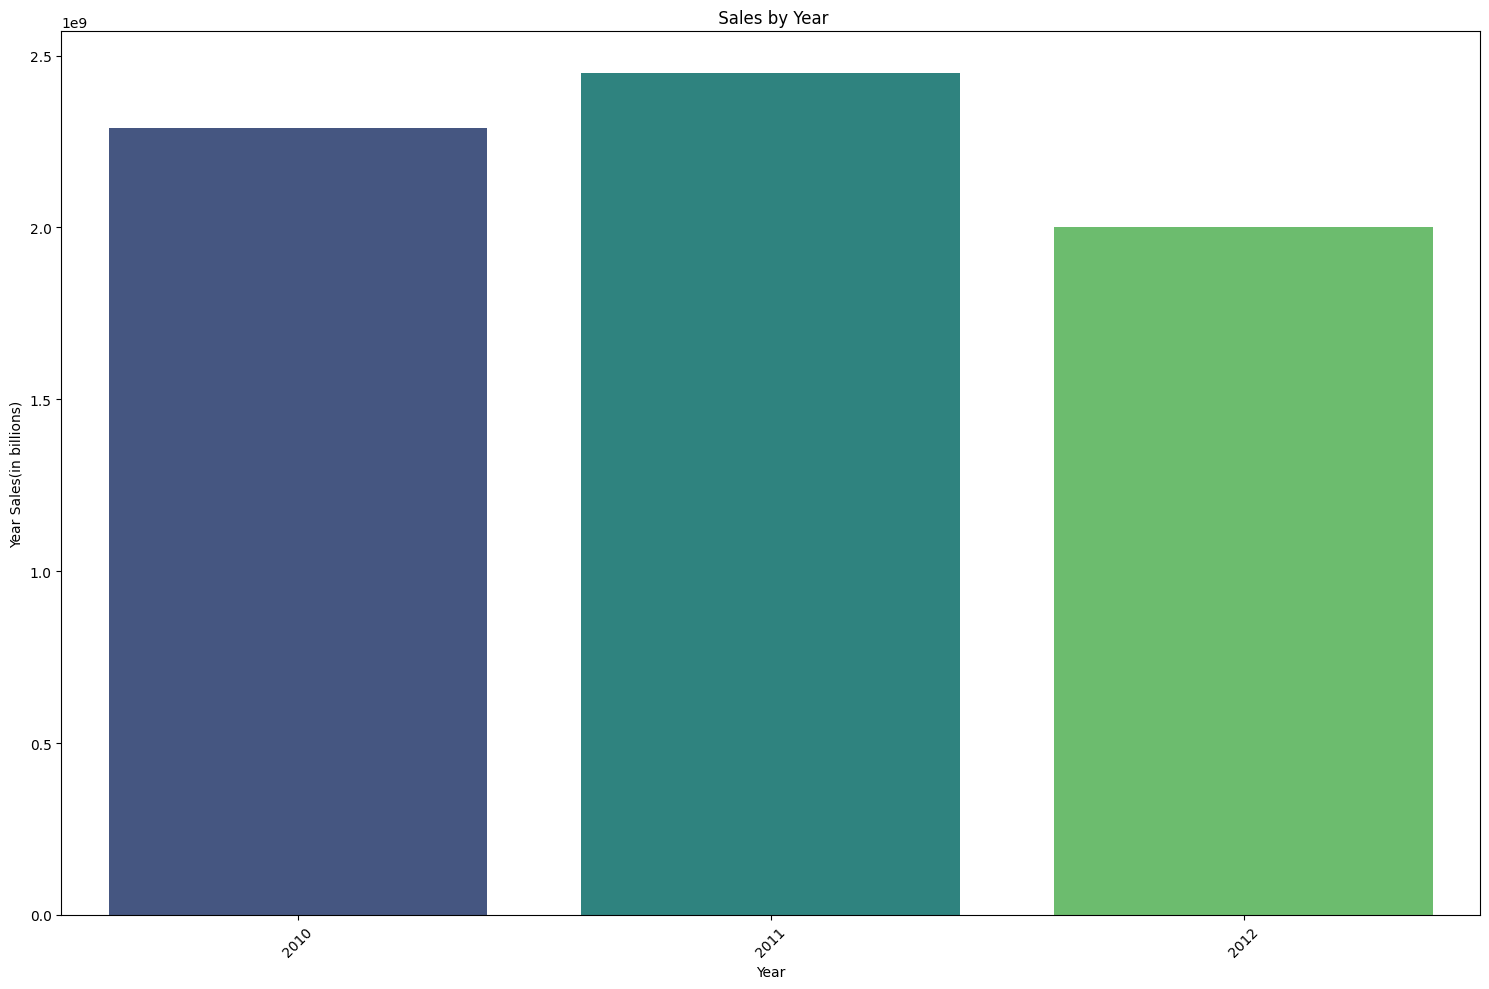

In [67]:
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()


plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Weekly_Sales', data=yearly_sales, palette='viridis')
plt.title(' Sales by Year')
plt.ylabel('Year Sales(in billions)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


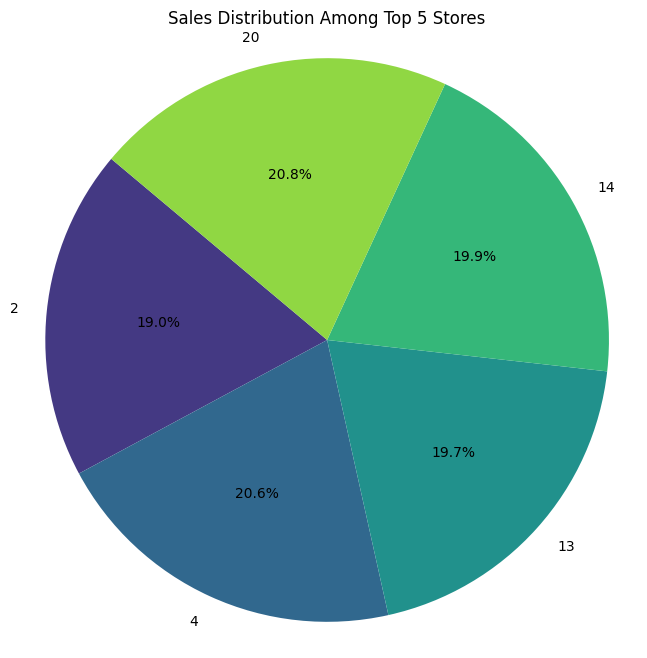

In [84]:
top_5_stores = (
    df.groupby('Store')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)
top_5_sales = (
    df[df['Store'].isin(top_5_stores)]
    .groupby('Store')['Weekly_Sales']
    .sum()
    .reset_index()
)

plt.figure(figsize=(8, 8))
plt.pie(
    top_5_sales['Weekly_Sales'],
    labels=top_5_sales['Store'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(top_5_sales))
)
plt.title('Sales Distribution Among Top 5 Stores')
plt.axis('equal')
plt.show()


In [101]:
df['Month']=df['Date'].dt.month
top_5_months=(
    df.groupby('Month')['Weekly_Sales'].sum().sort_values(ascending=False).head(5).reset_index()
)
top_5_months['Month']=top_5_months['Month'].apply(lambda x: f'{x:,.0f}')

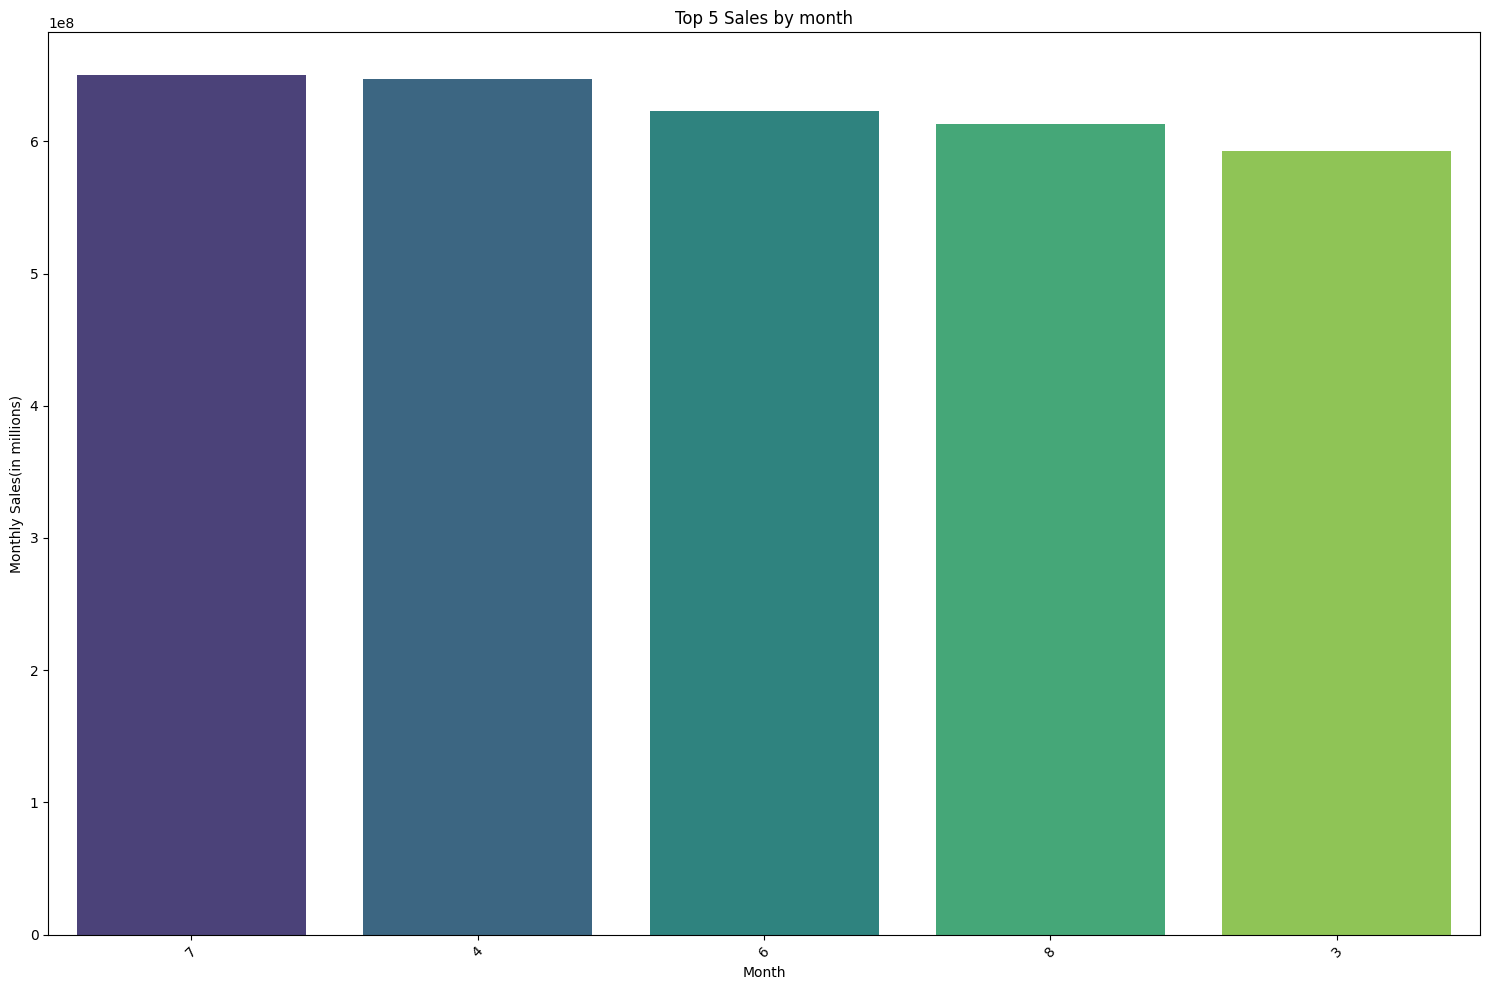

In [103]:
plt.figure(figsize=(15,10))
sns.barplot(x='Month', y='Weekly_Sales', data=top_5_months, palette='viridis')
plt.title('Top 5 Sales by month')
plt.ylabel('Monthly Sales(in millions)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Findings:
1. Top 5 Stores
2. Total Sales by year
3. Top 5 months with maximum sales

There was a huge dip in 2012 comapring other years sales

**Prediction Analysis**

In [113]:
df.drop('Date', axis=1, inplace=True)

In [114]:
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train RandomForest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [117]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R² Score:", r2)

MSE: 19493261739.066975
R² Score: 0.9394909652724325


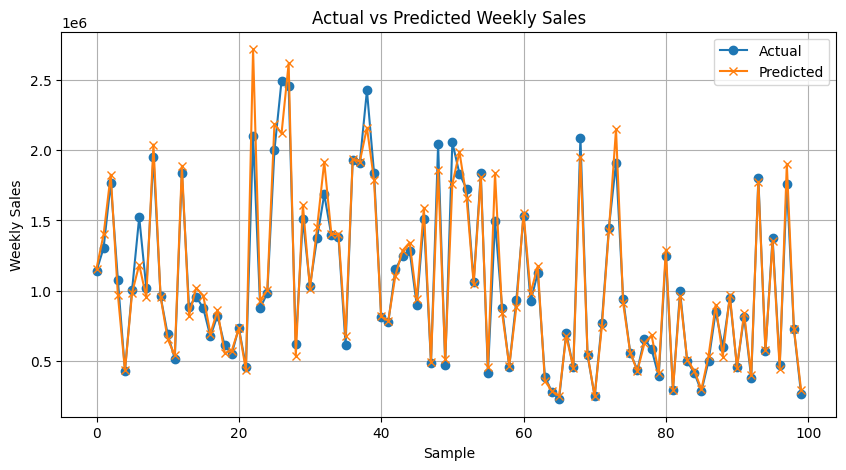

In [118]:
# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Sample')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

*The model achieves an R² of 0.94, indicating strong explanatory power, with an RMSE of approximately ₹1.4 lakh, which is acceptable given the scale of weekly sales.*